In [1]:
import re
import pandas as pd

In [2]:
f = open('chat.txt','r',encoding='utf-8')

In [3]:
data = f.read()
f.close()

In [4]:
print(data)

28/02/25, 4:35 pm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.
24/04/24, 10:20 am - Group creator created group "VIIIB 2018 LMSVM"
24/04/24, 10:20 am - You were added
24/02/25, 11:01 am - Rajnesh: Waiting for this message
24/02/25, 11:07 am - Aryan Sinha: abhi vo sub hi nhi hh
24/02/25, 12:59 pm - Aditya Gautam: Waiting for this message
24/02/25, 7:52 pm - Nilmani: Waiting for this message
24/02/25, 7:57 pm - Nilmani: Waiting for this message
24/02/25, 3:33 pm - Rajnesh: Waiting for this message
24/02/25, 7:57 pm - Nilmani: Waiting for this message
24/02/25, 3:33 pm - Rajnesh: Waiting for this message
24/02/25, 4:34 pm - Aditi: Krlo sare
24/02/25, 4:34 pm - Aditi: Wse bhi engineers ho
24/02/25, 8:49 pm - Nilmani: Waiting for this message
24/02/25, 4:35 pm - Aditi: Isika sahara lena pdega
24/02/25, 4:35 pm - Aditi: <Media omitted>
24/02/25, 4:36 pm - Aryan Sinha: 😔😔😔😔🫠🫠🫠🫠
24/02/25, 8:56 pm - Nilmani: Waiting for 

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s(?:am|pm)\s-\s'

In [6]:
messages = re.split(pattern,data)[1:] # One onwards as it first line contain empty string

In [7]:
dates = re.findall(pattern,data)

In [8]:
dates

['28/02/25, 4:35\u202fpm - ',
 '24/04/24, 10:20\u202fam - ',
 '24/04/24, 10:20\u202fam - ',
 '24/02/25, 11:01\u202fam - ',
 '24/02/25, 11:07\u202fam - ',
 '24/02/25, 12:59\u202fpm - ',
 '24/02/25, 7:52\u202fpm - ',
 '24/02/25, 7:57\u202fpm - ',
 '24/02/25, 3:33\u202fpm - ',
 '24/02/25, 7:57\u202fpm - ',
 '24/02/25, 3:33\u202fpm - ',
 '24/02/25, 4:34\u202fpm - ',
 '24/02/25, 4:34\u202fpm - ',
 '24/02/25, 8:49\u202fpm - ',
 '24/02/25, 4:35\u202fpm - ',
 '24/02/25, 4:35\u202fpm - ',
 '24/02/25, 4:36\u202fpm - ',
 '24/02/25, 8:56\u202fpm - ',
 '24/02/25, 8:57\u202fpm - ',
 '24/02/25, 4:45\u202fpm - ',
 '24/02/25, 5:17\u202fpm - ',
 '24/02/25, 7:04\u202fpm - ',
 '24/02/25, 7:05\u202fpm - ',
 '24/02/25, 7:05\u202fpm - ',
 '24/02/25, 7:05\u202fpm - ',
 '24/02/25, 7:05\u202fpm - ',
 '24/02/25, 7:05\u202fpm - ',
 '24/02/25, 7:55\u202fpm - ',
 '24/02/25, 7:55\u202fpm - ',
 '24/02/25, 8:25\u202fpm - ',
 '24/02/25, 8:28\u202fpm - ',
 '24/02/25, 8:40\u202fpm - ',
 '24/02/25, 8:40\u202fpm - ',
 '24/

In [9]:
# dates[0].replace("\u202f"," ")

In [10]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'],format = "%d/%m/%y, %I:%M\u202f%p - ")
df.rename(columns={'message_date' : 'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2025-02-28 16:35:00
1,"Group creator created group ""VIIIB 2018 LMSVM""\n",2024-04-24 10:20:00
2,You were added\n,2024-04-24 10:20:00
3,Rajnesh: Waiting for this message\n,2025-02-24 11:01:00
4,Aryan Sinha: abhi vo sub hi nhi hh\n,2025-02-24 11:07:00


In [11]:
df.shape

(8279, 2)

## Splitting User and Messages

In [12]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('^(.+?):\s',message)
    if entry[1:]:    #Username
        # if entry[1] == 'Aayush changed the group name from "Destroyer of worlds':
        #     print(message)
        if "changed the group name from " in entry[1]:
            print('True')
            users.append('notification')
            messages.append(message)
        else:
            users.append(entry[1])
            messages.append(entry[2])
    else :
        users.append('notification')
        messages.append(entry[0])


True
True


In [13]:
df = df.drop(columns="user_message")
df['user'] = users
df['message'] = messages
del users,messages

In [14]:
df.head()

,date,user,message
0,2025-02-28 16:35:00,notification,Messages and calls are end-to-end encrypted. O...
1,2024-04-24 10:20:00,notification,"Group creator created group ""VIIIB 2018 LMSVM""\n"
2,2024-04-24 10:20:00,notification,You were added\n
3,2025-02-24 11:01:00,Rajnesh,Waiting for this message\n
4,2025-02-24 11:07:00,Aryan Sinha,abhi vo sub hi nhi hh\n


In [15]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['date_of_monthh'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df['week_day'] = df['date'].dt.weekday
df.head()

,date,user,message,year,month,date_of_monthh,hour,minute,week_day
0,2025-02-28 16:35:00,notification,Messages and calls are end-to-end encrypted. O...,2025,February,2025-02-28,16,35,4
1,2024-04-24 10:20:00,notification,"Group creator created group ""VIIIB 2018 LMSVM""\n",2024,April,2024-04-24,10,20,2
2,2024-04-24 10:20:00,notification,You were added\n,2024,April,2024-04-24,10,20,2
3,2025-02-24 11:01:00,Rajnesh,Waiting for this message\n,2025,February,2025-02-24,11,1,0
4,2025-02-24 11:07:00,Aryan Sinha,abhi vo sub hi nhi hh\n,2025,February,2025-02-24,11,7,0


In [16]:
import numpy as np
df['message'].value_counts().index[0]

'<Media omitted>\n'

## For media

In [17]:
df[df['message'] == '<Media omitted>\n'].shape

(1249, 9)

In [18]:
df["user"].unique()

array(['notification', 'Rajnesh', 'Aryan Sinha', 'Aditya Gautam',
       'Nilmani', 'Aditi', 'Aayush', 'Meta AI'], dtype=object)

In [19]:
"changed the group name from " in 'Aayush changed the group name from "Destroyer of worlds'

True

In [20]:
from urlextract import URLExtract
extract = URLExtract()
num_url = 0
for message in df['message']:
    urls = extract.find_urls(message)
    num_url += len(urls)
print(num_url)

127


## Most Frequient Users

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Rajnesh'),
  Text(1, 0, 'Nilmani'),
  Text(2, 0, 'Aayush'),
  Text(3, 0, 'Aditya Gautam'),
  Text(4, 0, 'Aryan Sinha'),
  Text(5, 0, 'Aditi'),
  Text(6, 0, 'notification'),
  Text(7, 0, 'Meta AI')])

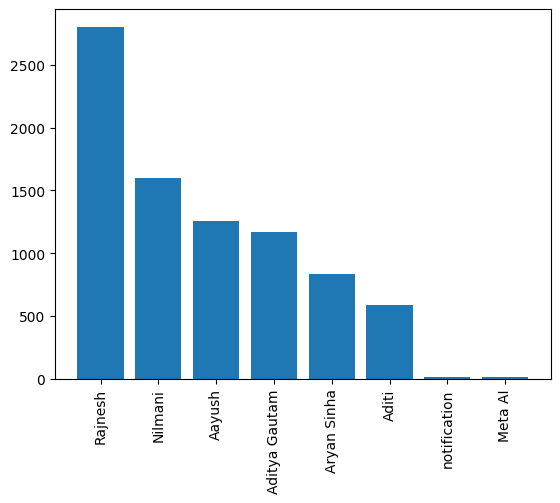

In [21]:
import matplotlib.pyplot as plt
count = df['user'].value_counts()
user = count.index
value = count.values
plt.bar(user,value)
plt.xticks(rotation = 90)

In [22]:
idx = count.index.to_list()
idx.remove('Meta AI')
idx.remove('notification')
count = count[idx]


C:\Users\kumar\AppData\Local\Temp\ipykernel_14896\4187940235.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(count.index, rotation=90)


[Text(0, 0, 'Rajnesh'),
 Text(1, 0, 'Nilmani'),
 Text(2, 0, 'Aayush'),
 Text(3, 0, 'Aditya Gautam'),
 Text(4, 0, 'Aryan Sinha'),
 Text(5, 0, 'Aditi')]

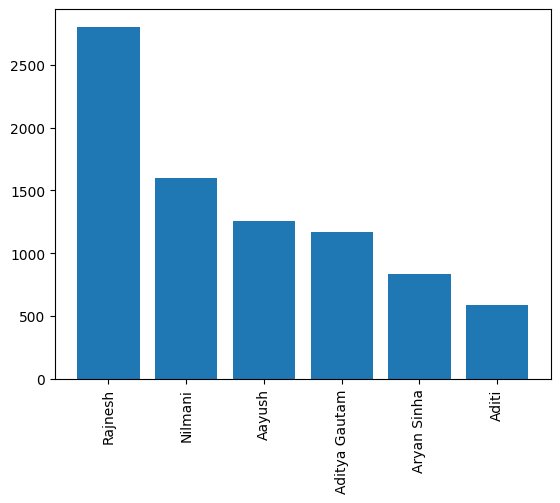

In [23]:
fig,ax = plt.subplots()
ax.bar(count.index,count.values)
ax.set_xticklabels(count.index, rotation=90)

In [24]:
count = count[idx]

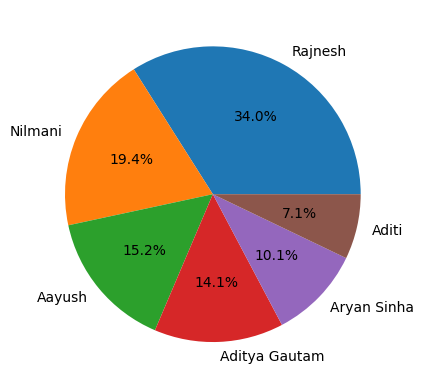

In [25]:
plt.pie(count.values,labels=count.index,autopct="%1.1f%%")
plt.show()

In [26]:
df.head(
)

,date,user,message,year,month,date_of_monthh,hour,minute,week_day
0,2025-02-28 16:35:00,notification,Messages and calls are end-to-end encrypted. O...,2025,February,2025-02-28,16,35,4
1,2024-04-24 10:20:00,notification,"Group creator created group ""VIIIB 2018 LMSVM""\n",2024,April,2024-04-24,10,20,2
2,2024-04-24 10:20:00,notification,You were added\n,2024,April,2024-04-24,10,20,2
3,2025-02-24 11:01:00,Rajnesh,Waiting for this message\n,2025,February,2025-02-24,11,1,0
4,2025-02-24 11:07:00,Aryan Sinha,abhi vo sub hi nhi hh\n,2025,February,2025-02-24,11,7,0


In [27]:
df['month_num'] = df["date"].dt.month

In [28]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + '-' + str(timeline['year'][i]))
timeline['time'] =  time
timeline.head()


,year,month_num,month,message,time
0,2024,4,April,2,April-2024
1,2025,2,February,366,February-2025
2,2025,3,March,2886,March-2025
3,2025,4,April,1091,April-2025
4,2025,5,May,1653,May-2025


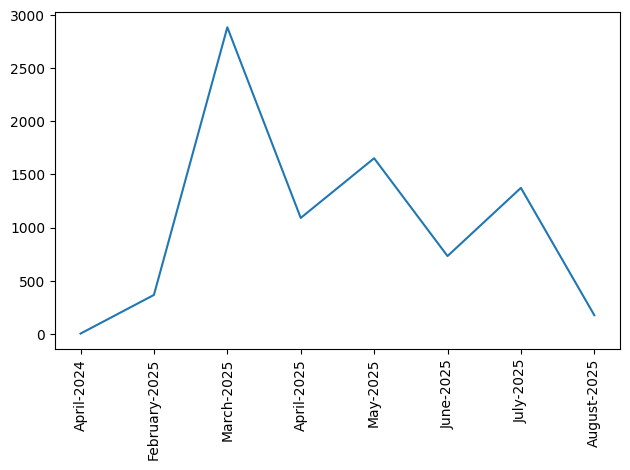

In [29]:
fig,ax = plt.subplots()
ax.plot(timeline['time'],timeline['message'])
plt.xticks(rotation = 90)
plt.tight_layout()

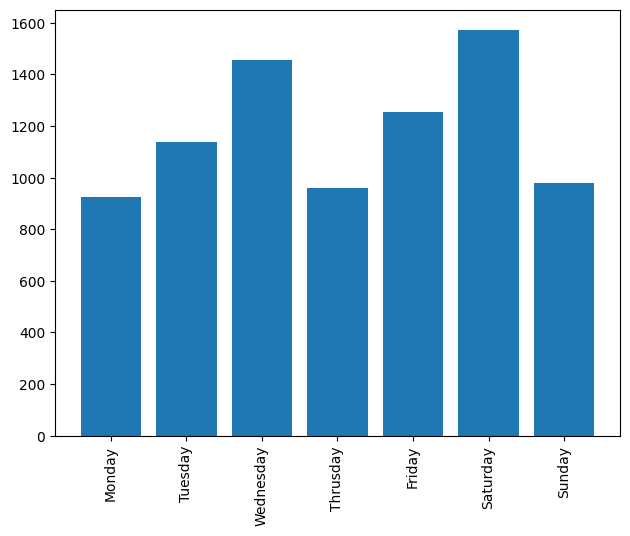

In [30]:
timeline  = (df.groupby('week_day').count()['message']).reset_index()
timeline['day_name'] = timeline['week_day'].map({0:'Monday',1:'Tuesday',2:"Wednesday",3:'Thrusday',4:'Friday',5:'Saturday',6:'Sunday'})
fix,ax = plt.subplots()
ax.bar(timeline['day_name'],timeline['message'])
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()


In [31]:
df.head()

,date,user,message,year,month,date_of_monthh,hour,minute,week_day,month_num
0,2025-02-28 16:35:00,notification,Messages and calls are end-to-end encrypted. O...,2025,February,2025-02-28,16,35,4,2
1,2024-04-24 10:20:00,notification,"Group creator created group ""VIIIB 2018 LMSVM""\n",2024,April,2024-04-24,10,20,2,4
2,2024-04-24 10:20:00,notification,You were added\n,2024,April,2024-04-24,10,20,2,4
3,2025-02-24 11:01:00,Rajnesh,Waiting for this message\n,2025,February,2025-02-24,11,1,0,2
4,2025-02-24 11:07:00,Aryan Sinha,abhi vo sub hi nhi hh\n,2025,February,2025-02-24,11,7,0,2


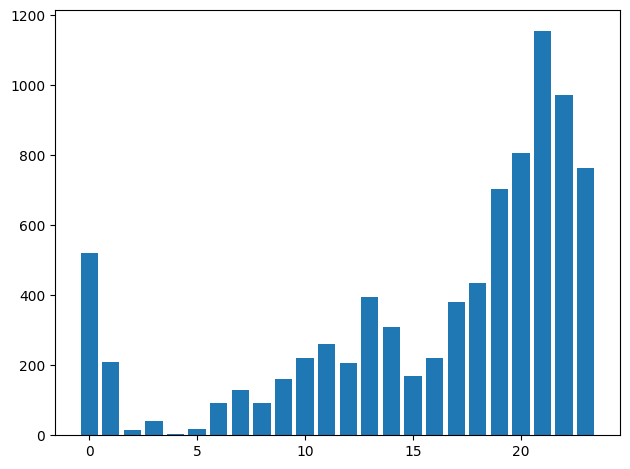

In [35]:
timeline = df.groupby('hour').count()['message'].reset_index()
fig,ax = plt.subplots()
ax.bar(timeline['hour'],timeline['message'])
plt.tight_layout()